<a href="https://colab.research.google.com/github/alen768/PortfolioProjects/blob/main/Dog_Cat_prediction(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cp '/content/drive/MyDrive/Datasets from Luminar Class/cat_dog_dataset/cat_dog_dataset.zip' '/content'

In [ ]:
!unzip '/content/cat_dog_dataset.zip'

In [ ]:
import tensorflow as tf

In [ ]:
#training data functions

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#model building functions

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
dataset_path = '/content/content/cat_dog_dataset'

In [ ]:
#hyperparamaters......model accuracy improve cheyan allel loss korekan

batch_size = 32
epochs = 10
image_size = (150,150)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

In [ ]:
training_generator = train_datagen.flow_from_directory(dataset_path,
                                                       target_size = image_size,
                                                       batch_size = batch_size,
                                                       class_mode = 'binary',
                                                       subset = 'training')

Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(dataset_path,
                                                         target_size = image_size,
                                                         batch_size = batch_size,
                                                         class_mode = 'binary',
                                                         subset = 'validation')

Found 2000 images belonging to 2 classes.


In [ ]:
#model building

model = Sequential()

#convolutional layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer

model.add(Flatten())  #150*150 = 22500

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(training_generator,
                    steps_per_epoch = training_generator.samples/batch_size,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.samples/batch_size,
                    epochs = epochs)

Epoch 1/10
250/250 [==============================] - 24s 78ms/step - loss: 0.9500 - accuracy: 0.6306 - val_loss: 0.5929 - val_accuracy: 0.7075
Epoch 2/10
250/250 [==============================] - 25s 100ms/step - loss: 0.4771 - accuracy: 0.7784 - val_loss: 0.5829 - val_accuracy: 0.7005
Epoch 3/10
250/250 [==============================] - 19s 78ms/step - loss: 0.3125 - accuracy: 0.8764 - val_loss: 0.6722 - val_accuracy: 0.6820
Epoch 4/10
250/250 [==============================] - 17s 67ms/step - loss: 0.1828 - accuracy: 0.9366 - val_loss: 0.7295 - val_accuracy: 0.7090
Epoch 5/10
250/250 [==============================] - 19s 77ms/step - loss: 0.1023 - accuracy: 0.9696 - val_loss: 0.8891 - val_accuracy: 0.6935
Epoch 6/10
250/250 [==============================] - 16s 66ms/step - loss: 0.0485 - accuracy: 0.9908 - val_loss: 1.0644 - val_accuracy: 0.6950
Epoch 7/10
250/250 [==============================] - 18s 71ms/step - loss: 0.0291 - accuracy: 0.9949 - val_loss: 1.2827 - val_accuracy

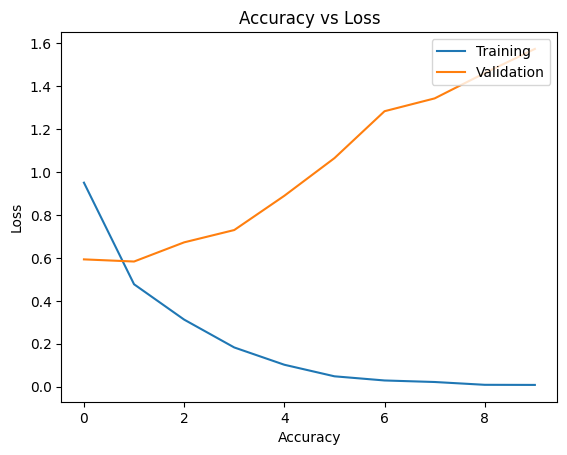

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Accuracy vs Loss')
plt.ylabel('Loss')
plt.xlabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#model building

model_2 = Sequential()

#convolutional layer
model_2.add(Conv2D(64,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))
model_2.add(Conv2D(128,(3,3),activation='relu',input_shape=(image_size[0],image_size[1],3)))

#pooling layer
model_2.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layer

model_2.add(Flatten())  #150*150 = 22500

model_2.add(Dense(128,activation='relu'))
model_2.add(Dense(1,activation='sigmoid'))

In [ ]:
model_2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history_2 = model_2.fit(training_generator,
                    steps_per_epoch = training_generator.samples/batch_size,
                    validation_data = validation_generator,
                    validation_steps = validation_generator.samples/batch_size,
                    epochs = epochs)

Epoch 1/10
250/250 [==============================] - 38s 130ms/step - loss: 0.9799 - accuracy: 0.5459 - val_loss: 0.6818 - val_accuracy: 0.5775
Epoch 2/10
250/250 [==============================] - 31s 124ms/step - loss: 0.6763 - accuracy: 0.5799 - val_loss: 0.6725 - val_accuracy: 0.5900
Epoch 3/10
250/250 [==============================] - 31s 123ms/step - loss: 0.6411 - accuracy: 0.6300 - val_loss: 0.6583 - val_accuracy: 0.6085
Epoch 4/10
250/250 [==============================] - 31s 125ms/step - loss: 0.4966 - accuracy: 0.7609 - val_loss: 0.6622 - val_accuracy: 0.6345
Epoch 5/10
250/250 [==============================] - 30s 122ms/step - loss: 0.2487 - accuracy: 0.8979 - val_loss: 0.9116 - val_accuracy: 0.6495
Epoch 6/10
250/250 [==============================] - 31s 124ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 1.3463 - val_accuracy: 0.6555
Epoch 7/10
250/250 [==============================] - 32s 129ms/step - loss: 0.0218 - accuracy: 0.9958 - val_loss: 1.7671 - val_ac

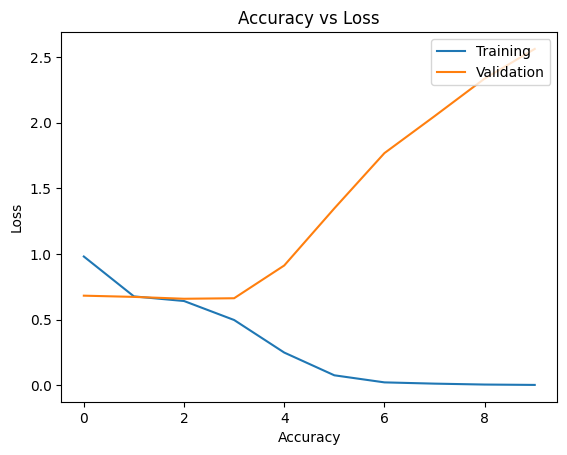

In [ ]:
# prompt: generate a graph for accuracy vs loss for history_2

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Accuracy vs Loss')
plt.ylabel('Loss')
plt.xlabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


In [ ]:
model.save('cat_dog_detection.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
def predict_image(image_path):
  img = image.load_img(image_path, target_size=image_size)  #load image
  img = image.img_to_array(img)   #converting to array
  img = np.expand_dims(img,axis = 0)   #expanding dimensions to match with model
  img /= 255.0  #normalizing image pixels to value 0-1


  result = model.predict(img)

  return 'Cat' if result<0.5 else 'Dog'

In [ ]:
img = '/content/pug.jpeg'
predict = predict_image(img)
print(predict)

1/1 [==============================] - 0s 26ms/step
Dog
